In [ ]:
import skimage ##importing the skimage
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from skimage.color import rgb2gray

import numpy as np
import pandas as pd
from skimage import exposure
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import skimage
from skimage.io import imread, imshow

#1: GrayScale Pixel Values

Grayscale pixel values are easy to extract. Grayscale values are less sensitive to variations in lighting conditions compared to color-based features.

(206, 155)
Height: 206
Width: 155


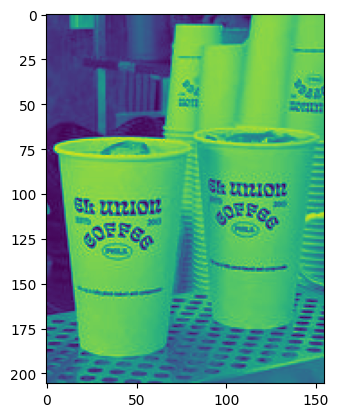

In [ ]:
# Read image
image = imread('/content/Coffee.jpg', as_gray=True)

h, w = image.shape
print(image.shape)
print('Height:', h)
print('Width:', w)

plt.imshow(image)

In [ ]:
features = np.reshape(image, (h*w))

print(features.shape)
features

(31930,)


array([0.12688196, 0.17394078, 0.1974702 , ..., 0.38553216, 0.38553216,
       0.38723647])

In [ ]:
import numpy as np
pixels = np.asarray(image)
pixels_reshape = pixels.reshape(pixels.shape[0],-1)

np.savetxt("image_coffee_PixelData.csv", pixels_reshape, delimiter=",")
pixels_reshape.shape

(206, 155)

In [ ]:
pixels_reshape

array([[0.12688196, 0.17394078, 0.1974702 , ..., 0.77597843, 0.77597843,
        0.77205686],
       [0.1464898 , 0.18570549, 0.20531333, ..., 0.77597843, 0.77597843,
        0.77205686],
       [0.15041137, 0.17786235, 0.18962706, ..., 0.77597843, 0.77597843,
        0.77205686],
       ...,
       [0.27323686, 0.26988078, 0.28164549, ..., 0.42198   , 0.42561882,
        0.42954039],
       [0.29957882, 0.26820627, 0.27997098, ..., 0.39115804, 0.39507961,
        0.39507961],
       [0.30014431, 0.28445804, 0.32310824, ..., 0.38553216, 0.38553216,
        0.38723647]])

#2: Mean Pixel Value of Channels
Extracting the mean pixel value of color channels in an image can be a useful feature extraction method. This can provide additional power.Combining color information with grayscale pixel values can provide a complementary set of features.*italicized text*

In [ ]:
image = imread('/content/Coffee.jpg')

h, w, c = image.shape
print(image.shape)
print('Height:', h)
print('Width:', w)
print('Channels:', c)

(206, 155, 3)
Height: 206
Width: 155
Channels: 3


In [ ]:
feature_matrix = np.zeros((h,w))
feature_matrix.shape

(206, 155)

In [ ]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

features = np.reshape(feature_matrix, (206*155))
print(features.shape)
features

(31930,)


array([30.66666667, 42.66666667, 48.66666667, ..., 99.        ,
       99.        , 99.33333333])

In [ ]:
import numpy as np
pixels = np.asarray(image)
pixels_reshape = pixels.reshape(pixels.shape[0],-1)

np.savetxt("Image_Coffee_MeanPixelData.csv", pixels_reshape, delimiter=",")
pixels_reshape.shape

(206, 465)

In [ ]:
df = pd.DataFrame(pixels_reshape)

print(df)
print(type(df))

     0    1    2    3    4    5    6    7    8    9    ...  455  456  457  \
0     32   33   27   44   45   39   50   51   45   46  ...  168  215  196   
1     37   38   32   47   48   42   52   53   47   49  ...  166  215  196   
2     38   39   33   45   46   40   48   49   43   47  ...  166  215  196   
3     38   39   33   41   42   36   44   45   39   45  ...  166  215  196   
4     40   41   35   42   43   37   44   45   39   48  ...  167  215  196   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
201   93   82   50   98   87   55  102   91   63   94  ...   96  119  104   
202   84   73   43   87   76   48   88   76   50   83  ...   92  125  108   
203   81   69   43   80   68   44   83   71   47   84  ...   88  123  104   
204   88   75   56   80   67   48   83   70   51   90  ...   84  116   96   
205   88   75   58   84   71   54   94   81   62  103  ...   83  117   94   

     458  459  460  461  462  463  464  
0    166  215  196  166  214  195 

#3: Extracting Edge Features
The edges in an image correspond to the boundaries between different textures and structures. Edge features typically result in a reduced dimensionality compared to using pixel values. Edges can capture fine texture details.

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

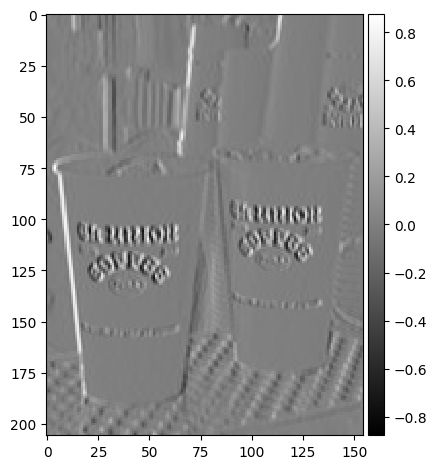

In [ ]:
image = imread("/content/Coffee.jpg",as_gray=True)

edges_prewitt_horizontal = prewitt_h(image)

edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

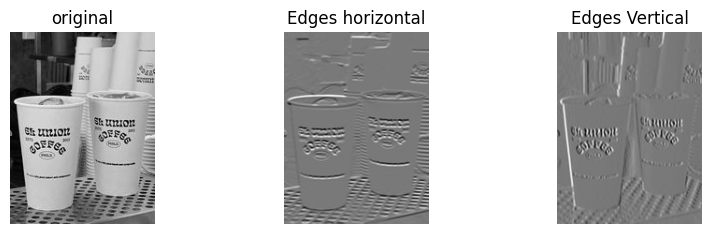

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(10,2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(image, cmap='gray')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(edges_prewitt_horizontal, cmap='gray')
ax[1].set_title('Edges horizontal')
ax[1].axis('off')

ax[2].imshow(edges_prewitt_vertical, cmap='gray')
ax[2].set_title('Edges Vertical')
ax[2].axis('off')


plt.show()

In [ ]:
edge_features_h = np.reshape(edges_prewitt_horizontal, (206*155))
print(edge_features_h.shape)
edge_features_h

(31930,)


array([ 0.01699346,  0.0130719 ,  0.01045752, ..., -0.00636497,
       -0.00767216, -0.00841124])

In [ ]:
edge_features_v = np.reshape(edges_prewitt_vertical, (206*155))
print(edge_features_v.shape)
edge_features_v[2000]

(31930,)


0.03498431372549016

In [ ]:
import numpy as np
pixels = np.asarray(edges_prewitt_horizontal)
pixels_reshape = pixels.reshape(pixels.shape[0],-1)

np.savetxt("Image_Coffee_EdgeHorizontalData.csv", pixels_reshape, delimiter=",")
pixels_reshape.shape

(206, 155)

In [ ]:
import numpy as np
pixels = np.asarray(edges_prewitt_vertical)
pixels_reshape = pixels.reshape(pixels.shape[0],-1)

np.savetxt("Image_Coffee_EdgeVerticalData.csv", pixels_reshape, delimiter=",")
pixels_reshape.shape

(206, 155)